# Install and Load Packages

In [232]:
!pip install sktime[all_extras]

In [233]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

# BASIC

In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 1

In [235]:
Task1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_1.csv")

In [236]:
# check data structure
Task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [237]:
# check the first 5 of rows
Task1.head()

,index,value
0,101,1.323913
1,102,1.197747
2,103,-0.951691
3,104,1.904784
4,105,-0.551699


**Line Chart**

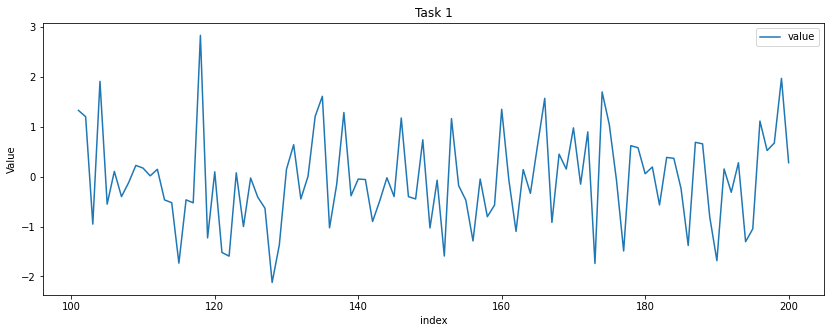

In [238]:
# simple line chart

Task1.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 1")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

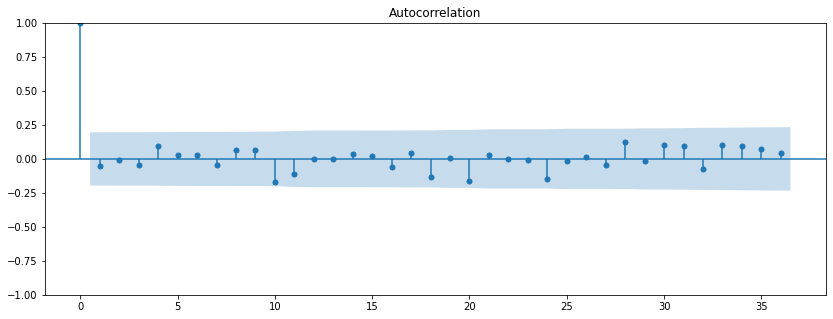

In [239]:
# ACF plot
plot_acf(
    Task1['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


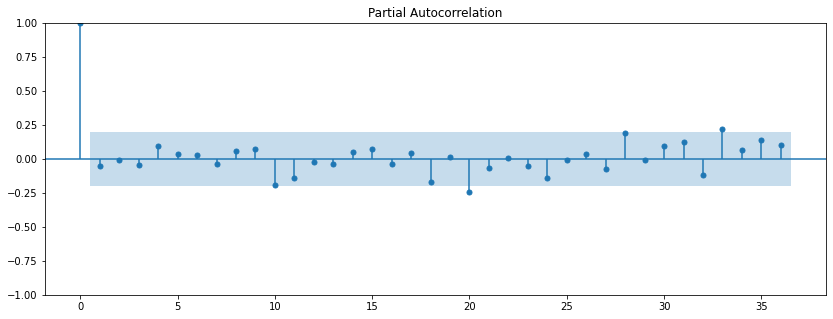

In [240]:
# PACF plot
plot_pacf(
    Task1['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan White Noise karena  ACF dan PACF tidak ada signifikan lag.

## Task 2

In [241]:
Task2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_2.csv")

In [242]:
# check data structure
Task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [243]:
# check the first 5 of rows
Task2.head()

,index,value
0,101,1.323695
1,102,1.198352
2,103,-0.948819
3,104,1.909786
4,105,-0.557036


**Line Chart**

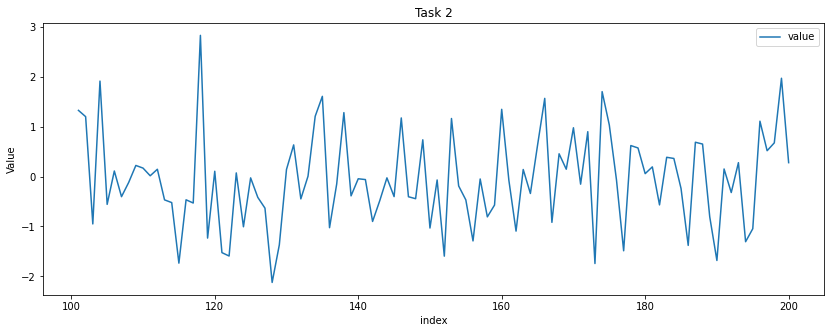

In [244]:
# simple line chart

Task2.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 2")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

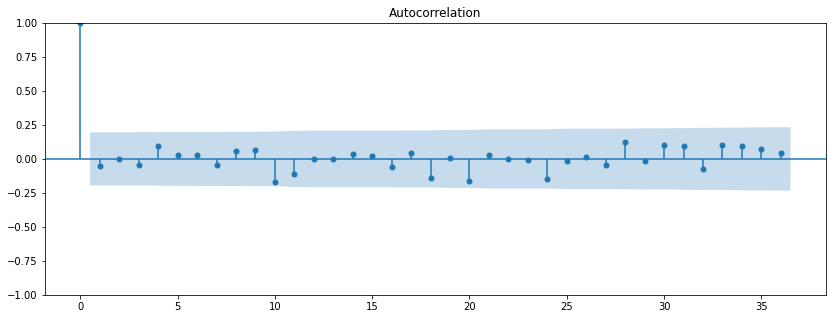

In [245]:
# ACF plot
plot_acf(
    Task2['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


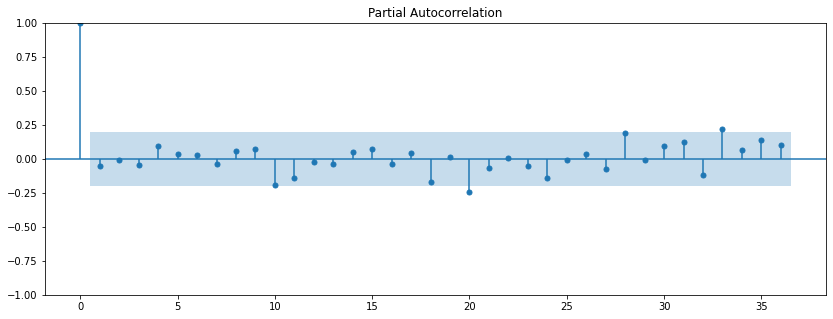

In [246]:
# PACF plot
plot_pacf(
    Task2['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan White Noise karena  ACF dan PACF tidak ada signifikan lag.

## Task 3

In [247]:
Task3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_3.csv")

In [248]:
# check data structure
Task3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [249]:
# check the first 5 of rows
Task3.head()

,index,value
0,101,1.311839
1,102,1.190370
2,103,-0.990590
3,104,1.901097
4,105,-0.522820


**Line Chart**

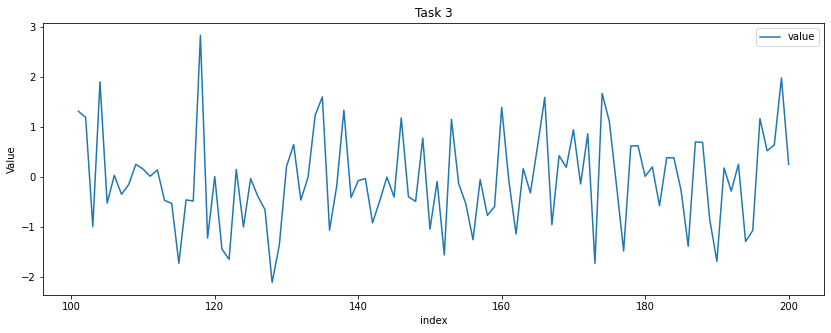

In [250]:
# simple line chart

Task3.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 3")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

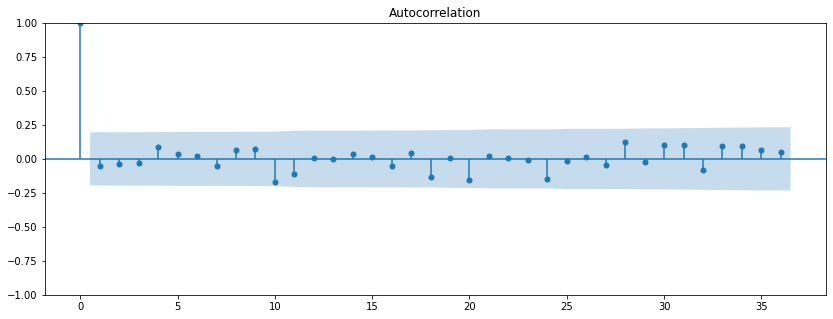

In [251]:
# ACF plot
plot_acf(
    Task3['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


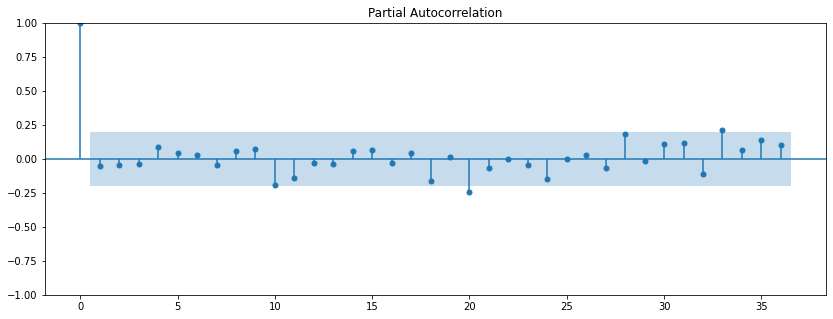

In [252]:
# PACF plot
plot_pacf(
    Task3['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan White Noise karena  ACF dan PACF tidak ada signifikan lag.

## Task 4

In [253]:
Task4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_4.csv")

In [254]:
# check data structure
Task4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [255]:
# check the first 5 of rows
Task4.head()

,index,value
0,101,2.362450
1,102,3.849367
2,103,2.421574
3,104,5.052382
4,105,4.103413


**Line Chart**

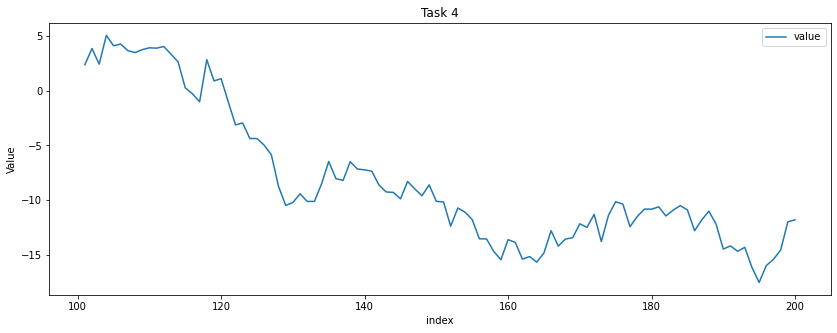

In [256]:
# simple line chart

Task4.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 4")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

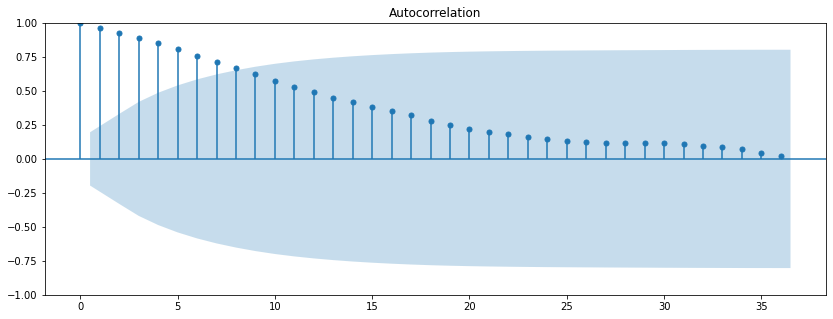

In [257]:
# ACF plot
plot_acf(
    Task4['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


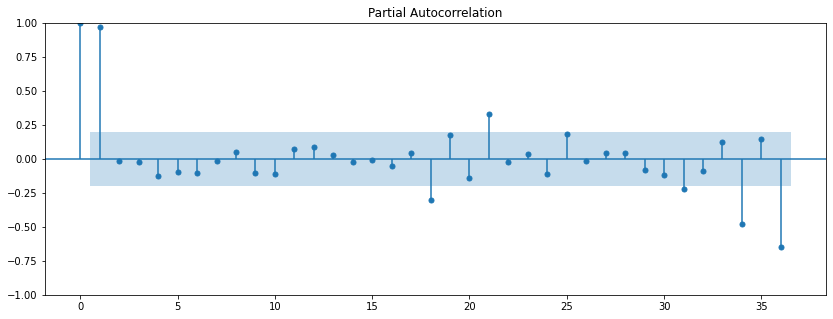

In [258]:
# PACF plot
plot_pacf(
    Task4['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan AR(1) karena ACF nya memiliki pola sehingga bisa diabaikan ACFnya dan fokus ke PACFnya ada lag yang nilainya melebihi garis yang signifikan di lag 1.

## Task 5

In [259]:
Task5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_5.csv")

In [260]:
# check data structure
Task5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [261]:
# check the first 5 of rows
Task5.head()

,index,value
0,101,-1.405059
1,102,0.471055
2,103,-0.006376
3,104,1.030057
4,105,0.207344


**Line Chart**

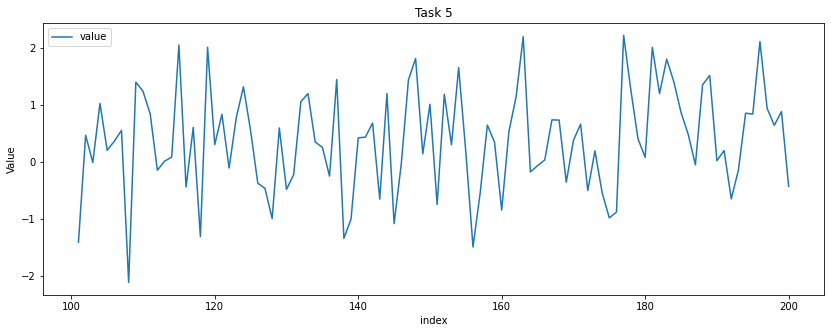

In [262]:
# simple line chart

Task5.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 5")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

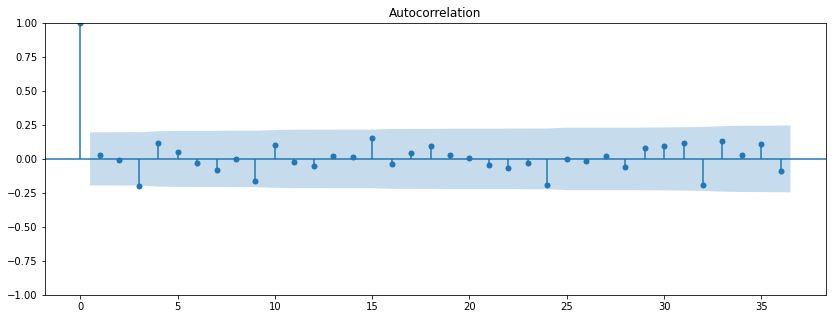

In [263]:
# ACF plot
plot_acf(
    Task5['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


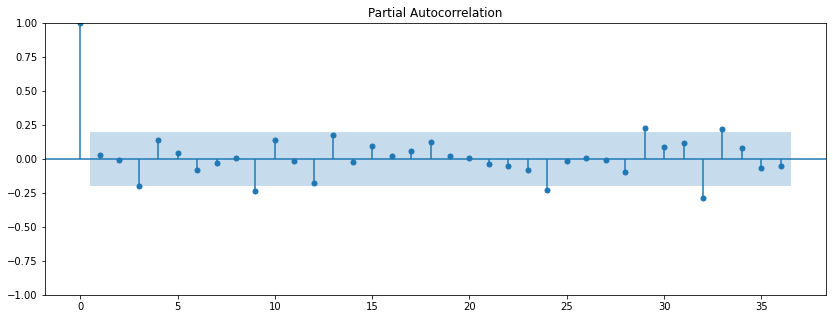

In [264]:
# PACF plot
plot_pacf(
    Task5['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan White Noise karena  ACF dan PACF tidak ada signifikan lag.

## Task 6

In [265]:
Task6 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_6.csv")

In [266]:
# check data structure
Task6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [267]:
# check the first 5 of rows
Task6.head()

,index,value
0,101,1.283148
1,102,1.120474
2,103,-1.012183
3,104,1.957444
4,105,-0.661834


**Line Chart**

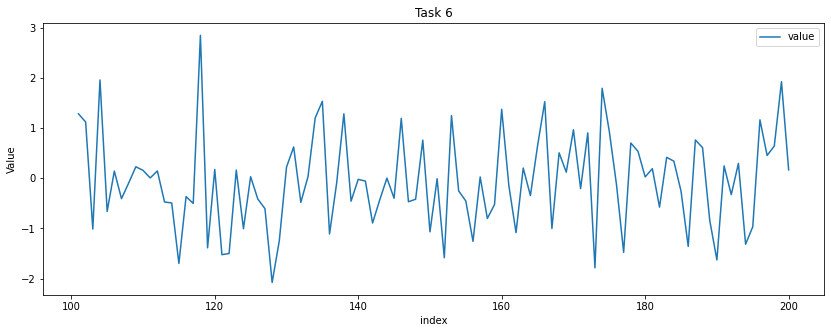

In [268]:
# simple line chart

Task6.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 6")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

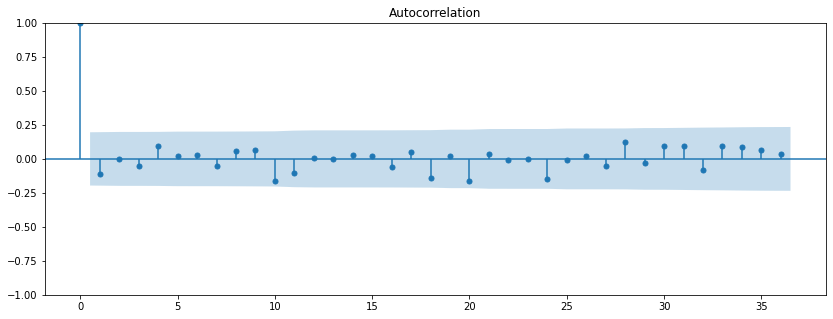

In [269]:
# ACF plot
plot_acf(
    Task6['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


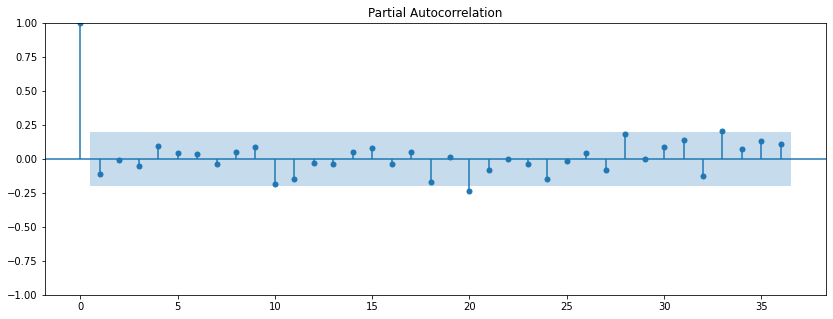

In [270]:
# PACF plot
plot_pacf(
    Task6['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan White Noise karena  ACF dan PACF tidak ada signifikan lag.

## Task 7

In [271]:
Task7 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_7.csv")

In [272]:
# check data structure
Task7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Line Chart**

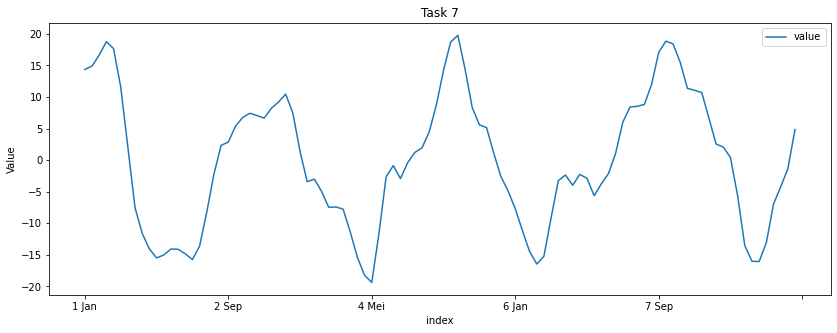

In [273]:
# simple line chart

Task7.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 7")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

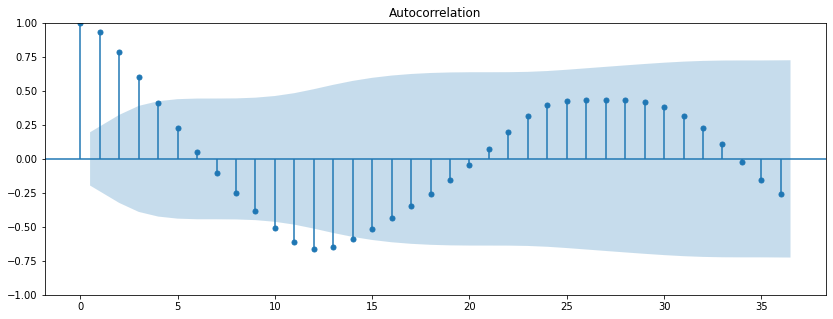

In [274]:
# ACF plot
plot_acf(
    Task7['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


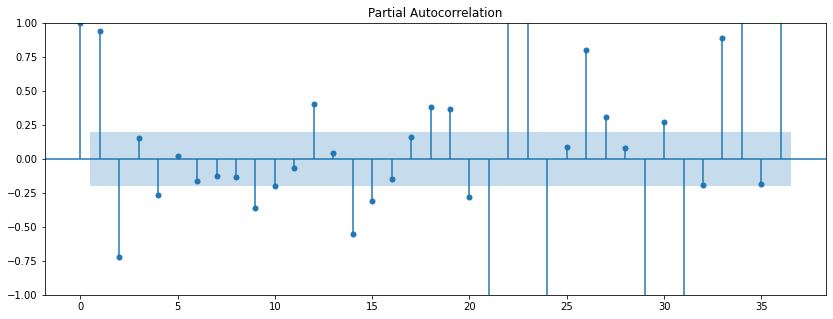

In [275]:
# PACF plot
plot_pacf(
    Task7['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan AR(2) karena ACF nya memiliki pola sehingga bisa diabaikan ACFnya dan fokus ke PACFnya ada lag yang nilainya melebihi garis yang terakhir signifikan di lag 2.

## Task 8

In [276]:
Task8 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_8.csv")

In [277]:
# check data structure
Task8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [278]:
# check the first 5 of rows
Task8.head()

,index,value
0,1 Jan,3.010220
1,1 Feb,0.500811
2,1 Mar,0.430380
3,1 Apr,3.807056
4,1 Mei,1.347951


**Line Chart**

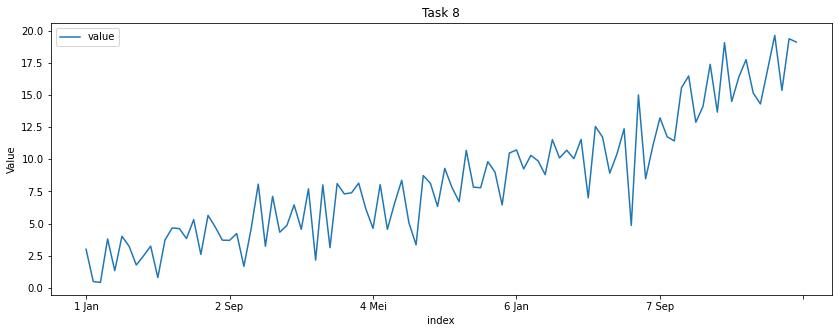

In [279]:
# simple line chart

Task8.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 8")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

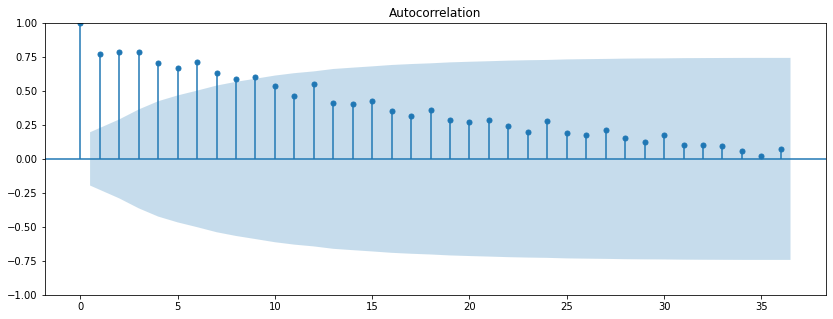

In [280]:
# ACF plot
plot_acf(
    Task8['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


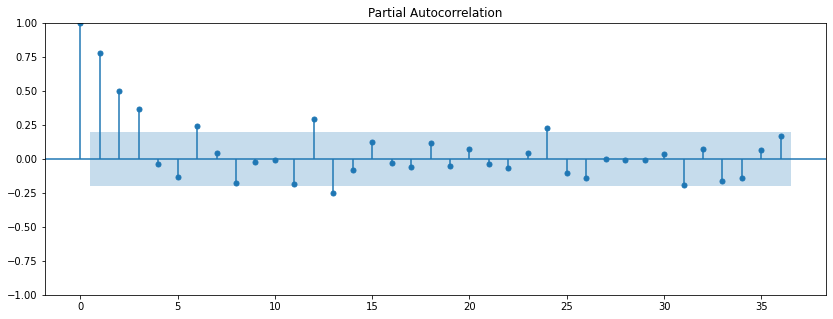

In [281]:
# PACF plot
plot_pacf(
    Task8['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan AR(3) karena ACF nya memiliki pola sehingga bisa diabaikan ACFnya dan fokus ke PACFnya ada lag yang nilainya melebihi garis yang terakhir signifikan di lag 3.

## Task 9

In [282]:
Task9 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_9.csv")

In [283]:
# check data structure
Task9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [284]:
# check the first 5 of rows
Task9.head()

,index,value
0,1 Jan,0.183993
1,1 Feb,1.712356
2,1 Mar,2.761235
3,1 Apr,2.977488
4,1 Mei,1.681076


**Line Chart**

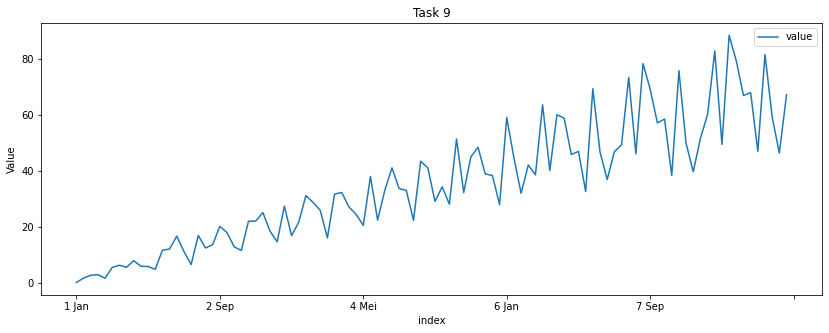

In [285]:
# simple line chart

Task9.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 9")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

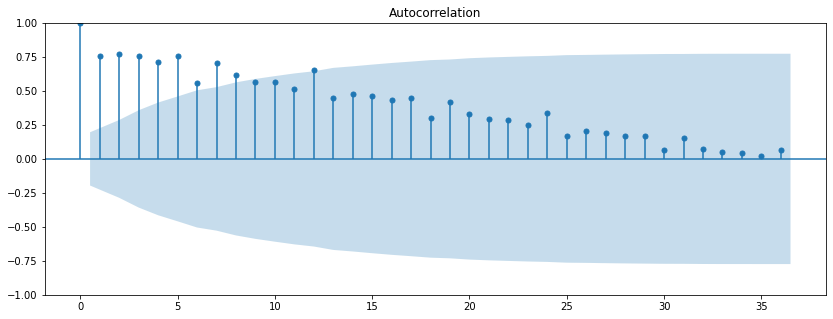

In [286]:
# ACF plot
plot_acf(
    Task9['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


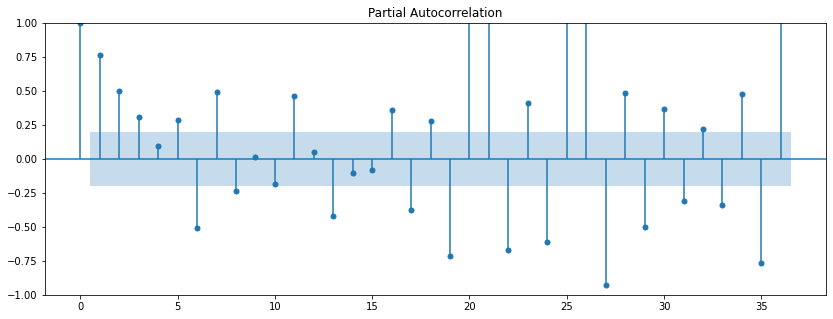

In [287]:
# PACF plot
plot_pacf(
    Task9['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan AR(3) karena ACF nya memiliki pola sehingga bisa diabaikan ACFnya dan fokus ke PACFnya ada lag yang nilainya melebihi garis yang terakhir signifikan di lag 3.

## Task 10

In [288]:
Task10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series_analysis_task/task_1_10.csv")

In [289]:
# check data structure
Task10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [290]:
# check the first 5 of rows
Task10.head()

,index,value
0,1 Jan,0.167240
1,1 Feb,4.048346
2,1 Mar,0.898316
3,1 Apr,-5.074511
4,1 Mei,-3.305332


**Line Chart**

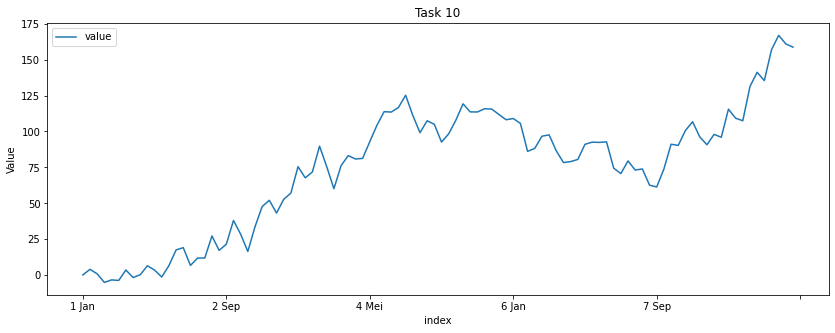

In [291]:
# simple line chart

Task10.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.title("Task 10")
plt.ylabel("Value")
plt.show()

**ACF & PACF**

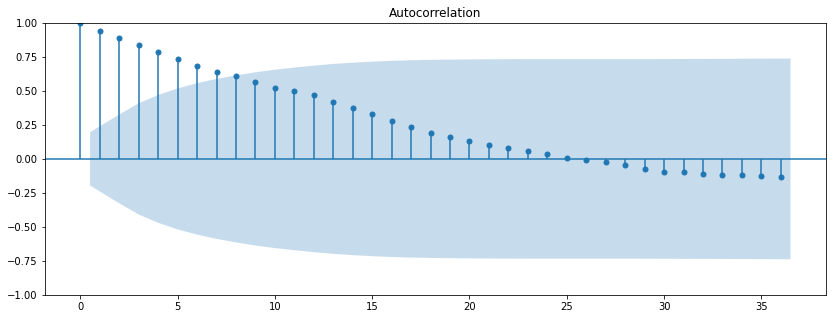

In [292]:
# ACF plot
plot_acf(
    Task10['value'], 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


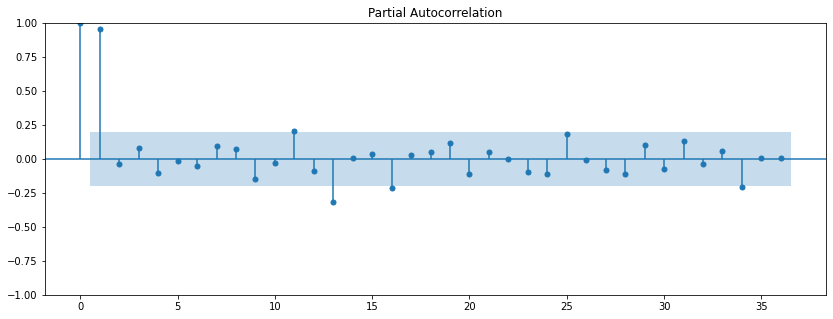

In [293]:
# PACF plot
plot_pacf(
    Task10['value'], 
    lags = 36
).set_size_inches((14,5));

**Jenis Time Series**

Berdasarkan analisis ACF dan PACF, data tersebut merupakan AR(1) karena ACF nya memiliki pola sehingga bisa diabaikan ACFnya dan fokus ke PACFnya ada lag yang nilainya melebihi garis yang signifikan di lag 1.

# ADVANCED

**Load Dataset**

In [294]:
SuperStoreTrain = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv")

**Preprocess Data**

In [295]:
# check the first 5 rows
SuperStoreTrain.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [296]:
# check data structure
SuperStoreTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

## Nomor 1

Hitunglah jumlah pembeli, jumlah transaksi, GMV, dan profit yang diperoleh dengan rentang waktu berikut:

a. Harian

b. Mingguan

c. Bulanan

Catatan: GMV dihitung berdasarkan total spending yang dilakukan customer dengan memperhitungkan semua biaya dan diskon yang dibayarkan customer

**Daily**

In [297]:
# create Order Date column
SuperStoreTrain['Order Date'] = pd.to_datetime(SuperStoreTrain['Order Date']).dt.normalize()

# create gmv and profit
SuperStoreTrain["gmv"] = (1 - SuperStoreTrain["Discount"]) * (SuperStoreTrain["Sales"]) * (SuperStoreTrain["Quantity"]) 
SuperStoreTrain["profit"] = (SuperStoreTrain["Profit"]) * (SuperStoreTrain["Quantity"]) 

# Aggregate data
SuperStoreTrain_daily = SuperStoreTrain.groupby('Order Date', as_index=False).agg({
    "Customer ID": 'nunique',
    "Order ID": 'nunique',
    "gmv": 'sum',
    "profit" : 'sum'
}).query("gmv > 0")

# Renaming
SuperStoreTrain_daily = SuperStoreTrain_daily.rename(columns={
    "Order Date":"Daily",
    "Customer ID": "Total Buyer",
    "Order ID": "Total TRX",
    "gmv": "GMV",
    "profit" : 'Total Profit'
})

SuperStoreTrain_daily.head()

,Daily,Total Buyer,Total TRX,GMV,Total Profit
0,2014-01-03,1,1,26.3168,11.1024
1,2014-01-04,1,1,684.2640,-192.4833
2,2014-01-05,1,1,46.8864,14.6520
3,2014-01-06,3,3,28430.7800,8361.3628
4,2014-01-07,1,1,106.6756,-288.8963


In [298]:
# check data structure
SuperStoreTrain_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Daily         1181 non-null   datetime64[ns]
 1   Total Buyer   1181 non-null   int64         
 2   Total TRX     1181 non-null   int64         
 3   GMV           1181 non-null   float64       
 4   Total Profit  1181 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 55.4 KB


**Weekly**

In [299]:
# create Order Date column
SuperStoreTrain['Order Date'] = pd.to_datetime(SuperStoreTrain['Order Date']).dt.normalize()

# create gmv and profit
SuperStoreTrain["gmv"] = (1 - SuperStoreTrain["Discount"]) * (SuperStoreTrain["Sales"]) * (SuperStoreTrain["Quantity"]) 
SuperStoreTrain["profit"] = (SuperStoreTrain["Profit"]) * (SuperStoreTrain["Quantity"]) 

# Aggregate data
SuperStoreTrain_daily = SuperStoreTrain.groupby('Order Date', as_index=False).agg({
    "Customer ID": 'nunique',
    "Order ID": 'nunique',
    "gmv": 'sum',
    "profit" : 'sum'
}).query("gmv > 0")

# Renaming
SuperStoreTrain_daily = SuperStoreTrain_daily.rename(columns={
    "Order Date":"Weekly",
    "Customer ID": "Total Buyer",
    "Order ID": "Total TRX",
    "gmv": "GMV",
    "profit" : 'Total Profit'
})

In [300]:
SuperStoreTrain_daily['Weekly'] = pd.to_datetime(SuperStoreTrain_daily['Weekly'])
SuperStoreTrain_daily = SuperStoreTrain_daily.set_index('Weekly')
SuperStoreTrain_weekly = SuperStoreTrain_daily.resample('W').sum()
SuperStoreTrain_weekly.head()

,Total Buyer,Total TRX,GMV,Total Profit
Weekly,,,,
2014-01-05,3,3,757.46720,-166.7289
2014-01-12,7,7,28701.99600,8132.8690
2014-01-19,8,8,21346.19685,2261.6341
2014-01-26,5,5,17515.54580,2977.0297
2014-02-02,6,6,4855.61460,1310.8421


**Monthly**

In [301]:
# create Order Date column
SuperStoreTrain['Order Date'] = pd.to_datetime(SuperStoreTrain['Order Date']).dt.normalize()

# create gmv and profit
SuperStoreTrain["gmv"] = (1 - SuperStoreTrain["Discount"]) * (SuperStoreTrain["Sales"]) * (SuperStoreTrain["Quantity"]) 
SuperStoreTrain["profit"] = (SuperStoreTrain["Profit"]) * (SuperStoreTrain["Quantity"]) 

# Aggregate data
SuperStoreTrain_daily = SuperStoreTrain.groupby('Order Date', as_index=False).agg({
    "Customer ID": 'nunique',
    "Order ID": 'nunique',
    "gmv": 'sum',
    "profit" : 'sum'
}).query("gmv > 0")

# Renaming
SuperStoreTrain_daily = SuperStoreTrain_daily.rename(columns={
    "Order Date":"Monthly",
    "Customer ID": "Total Buyer",
    "Order ID": "Total TRX",
    "gmv": "GMV",
    "profit" : 'Total Profit'
})

In [302]:
SuperStoreTrain_daily['Monthly'] = pd.to_datetime(SuperStoreTrain_daily['Monthly'])
SuperStoreTrain_daily = SuperStoreTrain_daily.set_index('Monthly')
SuperStoreTrain_monthly = SuperStoreTrain_daily.resample('M').sum()
SuperStoreTrain_monthly.head()

,Total Buyer,Total TRX,GMV,Total Profit
Monthly,,,,
2014-01-31,27,27,70301.67045,13248.7275
2014-02-28,17,17,14306.86320,2916.3619
2014-03-31,54,54,179793.05730,-1647.9307
2014-04-30,51,51,102803.44365,12472.8154
2014-05-31,56,56,73994.53750,13325.2912


## Nomor 2

Hitunglah monthly retention dari kegiatan transaksi yang terjadi di dalam platform e-commerce.

Catatan: Monthly retention dihitung berdasarkan jumlah customer yang kembali berbelanja setelah sebelumnya juga berbelanja di bulan sebelumnya

In [303]:
# set Date as index
SuperStoreTrain = SuperStoreTrain.set_index('Order Date')
SuperStoreTrain.index = pd.PeriodIndex(SuperStoreTrain.index, freq = 'M')

In [304]:
#identifying active users are active by looking at their order count per month
UserPurchase = SuperStoreTrain.groupby(['Customer ID','Order Date'])['Profit'].count().reset_index()
UserPurchase.head()

,Customer ID,Order Date,Profit
0,AA-10315,2014-03,2
1,AA-10315,2014-09,2
2,AA-10315,2015-10,1
3,AA-10315,2016-03,4
4,AA-10315,2017-06,2


In [305]:
#create retention matrix with crosstab using purchase
Retention = pd.crosstab(UserPurchase['Customer ID'], UserPurchase['Order Date']).reset_index()

Retention.head()

Order Date,Customer ID,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,AA-10315,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,AA-10375,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,AA-10480,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,AA-10645,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,AB-10015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#creating an array of dictionary which keeps Retained User count for each month
months = Retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['Month'] = pd.to_datetime(selected_month)
    retention_data['RetainedUserCount'] = Retention[(Retention[selected_month]>0) & (Retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
Retention = pd.DataFrame(retention_array)

Retention

,Month,RetainedUserCount
0,2014-01-05,0
1,2014-01-06,0
2,2014-01-07,0
3,2014-01-09,0
4,2014-01-10,0
...,...,...
1174,2017-12-26,0
1175,2017-12-27,0
1176,2017-12-28,0
1177,2017-12-29,0


## Nomor 3

Identifikasi produk-produk apa saja yang membawa profit terbesar dalam 3 bulan terakhir

In [306]:
# create profit
SuperStoreTrain["profit"] = (SuperStoreTrain["Profit"]) * (SuperStoreTrain["Quantity"]) 

# Aggregate data
Product = SuperStoreTrain.groupby(['Order Date', 'Product Name'])['profit'].sum().reset_index()

# Renaming
Product = Product.rename(columns={
    "Order Date":"Monthly",
    "Product Name": "Product",
    "profit" : 'Total Profit'
})

Product.tail(3)

,Monthly,Product,Total Profit
7521,2017-12,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",27.0112
7522,2017-12,Zipper Ring Binder Pockets,32.5728
7523,2017-12,iKross Bluetooth Portable Keyboard + Cell Phon...,26.8160


## Nomor 4

Buatlah model forecasting menggunakan model yang sudah diajarkan pada materi day 12 untuk memprediksi jumlah transaksi untuk 1 bulan kedepan dengan data harian. Anda diharuskan setidaknya membuat 2 model untuk selanjutnya diambil model terbaik berdasarkan MAPE terkecil. Berikan rekomendasi apa yang perlu dilakukan tim bisnis berdasarkan hasil forecasting dan analisis anda.

In [307]:
SuperStoreTrain = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv")

In [308]:
# Aggregate data
trx = SuperStoreTrain.groupby('Order Date', as_index=False).agg({"Order ID": 'nunique'})

# Renaming
trx = trx.rename(columns={"Order ID": "Total TRX"})

trx.head()

,Order Date,Total TRX
0,2014-01-03,1
1,2014-01-04,1
2,2014-01-05,1
3,2014-01-06,3
4,2014-01-07,1


**Line Chart**

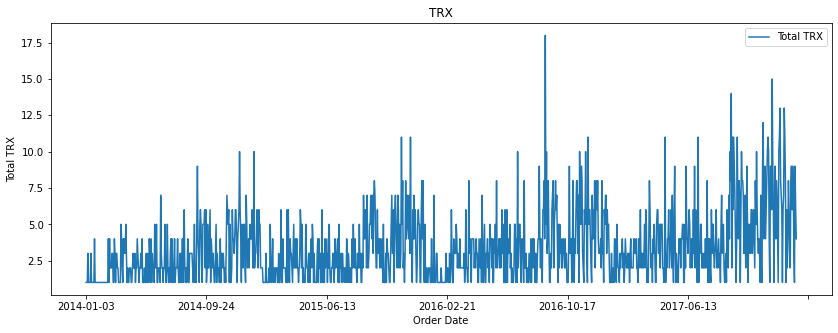

In [309]:
# simple line chart

trx.plot(
    x = 'Order Date', 
    y = 'Total TRX',
    figsize = (14,5)
)
plt.title("TRX")
plt.ylabel("Total TRX")
plt.show()

**Unit Root Test**

In [310]:
# define adf_test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adf_test(trx['Total TRX'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.353399
p-value                           0.012654
#Lags Used                       19.000000
Number of Observations Used    1161.000000
Critical Value (1%)              -3.435995
Critical Value (5%)              -2.864033
Critical Value (10%)             -2.568097
dtype: float64


Untuk mengetahui data tersebut perlu differencing atau tidak, saya melakukan Augmented Dickey Fuller Test. Dari ADF Test, p-value nya < 0,05 jadi data tersebut stasioner dan tidak perlu dilakukan differencing.

**Variance Stabilization**

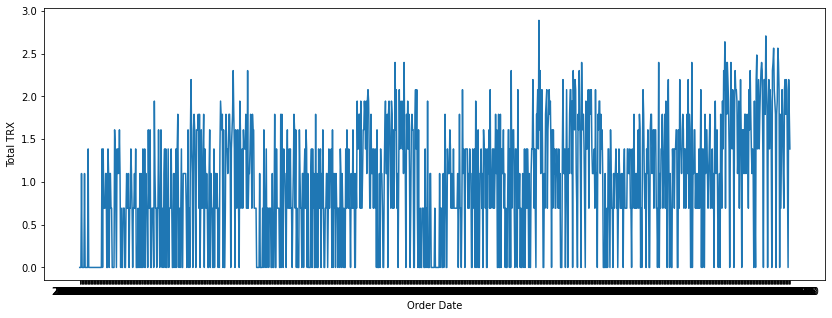

In [311]:
# create line plot
plt.figure(figsize=(14,5))
sns.lineplot(
    x = trx['Order Date'],
    y = np.log(trx['Total TRX']),
    sizes = (14,5)
);

Untuk memperkecil variance dari time series, saya menggunakan variance stabilization logaritma.

**ACF & PACF**

In [ ]:
# ACF plot
plot_acf(
    np.log(trx['Total TRX']), 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


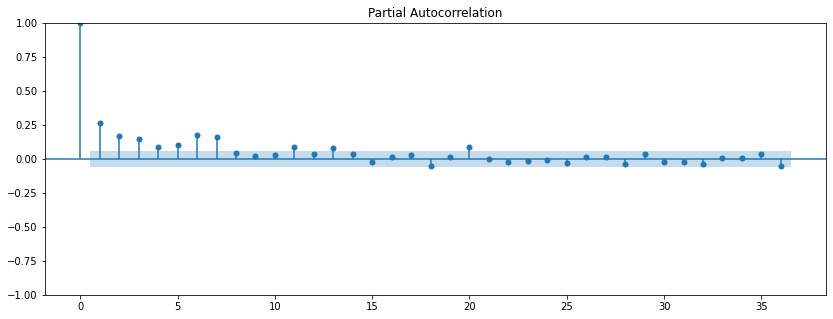

In [312]:
# PACF plot
plot_pacf(
    np.log(trx['Total TRX']), 
    lags = 36
).set_size_inches((14,5));

**Train-Test Split**

In [313]:
# Do train-test split
y_train, y_test = temporal_train_test_split(trx['Total TRX'], test_size=30)

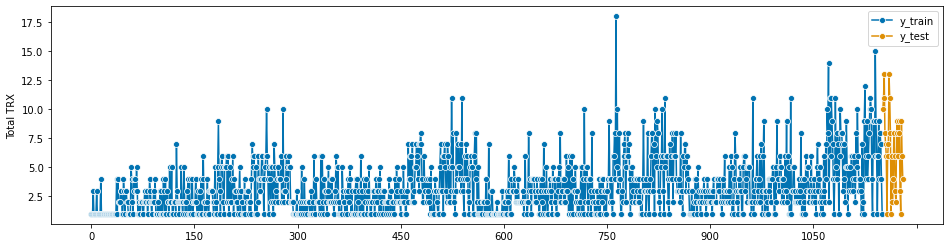

In [314]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [315]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [316]:
fh

ForecastingHorizon([1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161,
            1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172,
            1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180],
           dtype='int64', is_relative=False)

### AutoETS

#### Modeling

In [317]:
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=30)

sp = 30 karena memprediksi jumlah transaksi untuk 1 bulan kedepan dengan data harian. 1 bulan ada 30 hari

In [318]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

AutoETS(auto=True, sp=30)

In [319]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

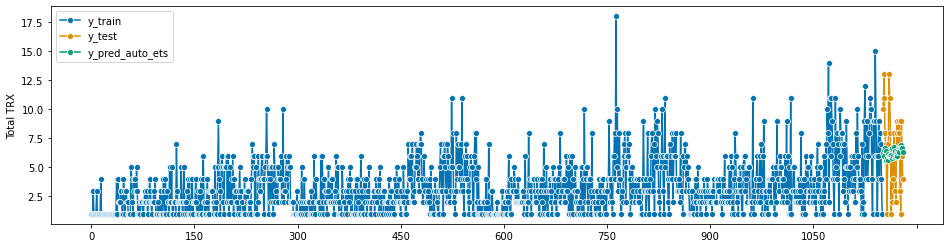

In [320]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

#### Model Diagnostic

In [321]:
# find residuals
residuals = y_test - y_pred_auto_ets

**Plot Residuals**

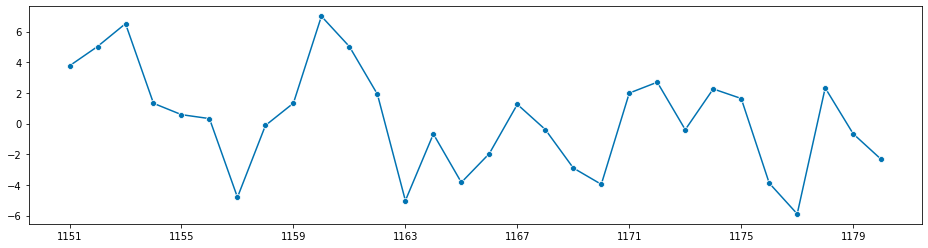

In [322]:
plot_series(residuals);

**Normality of Residuals**

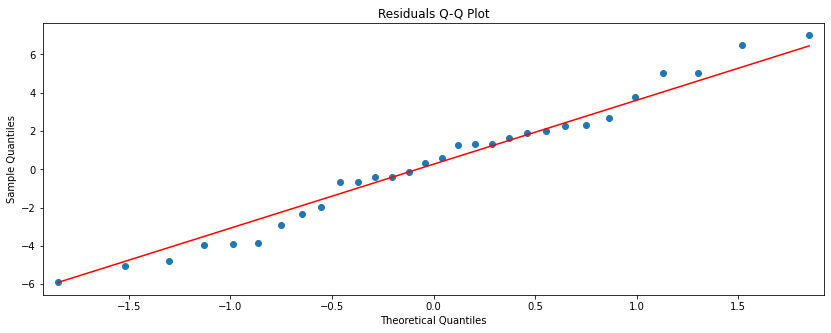

In [323]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

**Random Walk Pattern of Residuals**

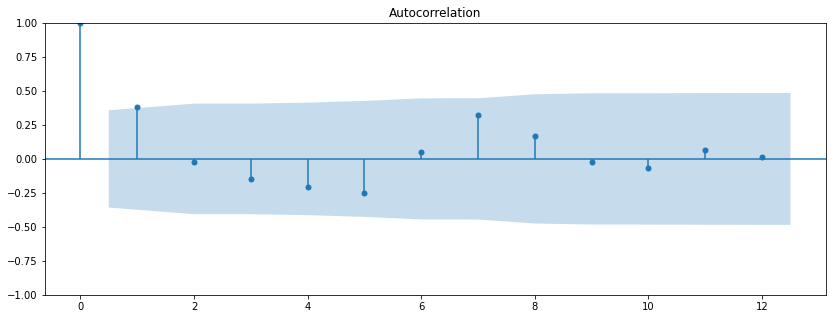

In [324]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

Residual tidak stasioner ada trend nya. Distribusi residualnya mendekati normal tapi masih ada autokorelasi

#### Model Evaluation

In [325]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


48.07468484703261

### TBATS

#### Modeling

**Modeling**

In [326]:
# define TBATS model
tbats_forecaster = TBATS(sp=30)

sp = 30 karena memprediksi jumlah transaksi untuk 1 bulan kedepan dengan data harian. 1 bulan ada 30 hari

In [327]:
# fit forecaster to data
tbats_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/tbats/transformation/BoxCox.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(y)


TBATS(sp=30)

In [328]:
# do prediction based on forecast horizon we already defined
y_pred_tbats = tbats_forecaster.predict(fh=fh)

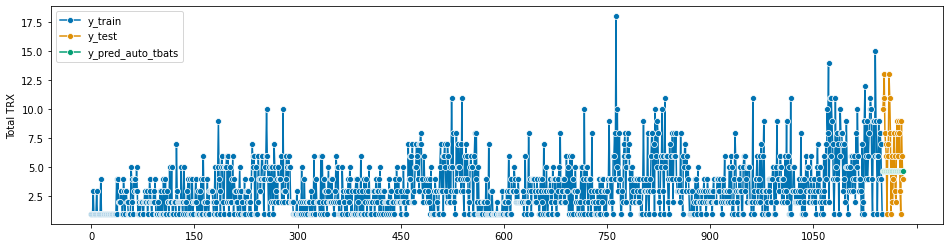

In [329]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_tbats, labels=["y_train", "y_test", "y_pred_auto_tbats"]);

#### Model Diagnostic

In [330]:
# find residuals
residuals = y_test - y_pred_tbats

**Plot Residuals**

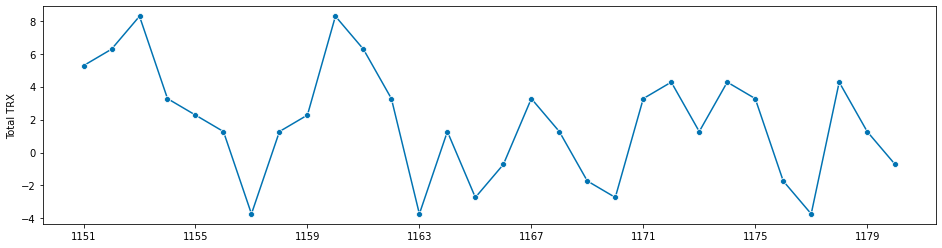

In [331]:
plot_series(residuals);

**Normality of Residuals**

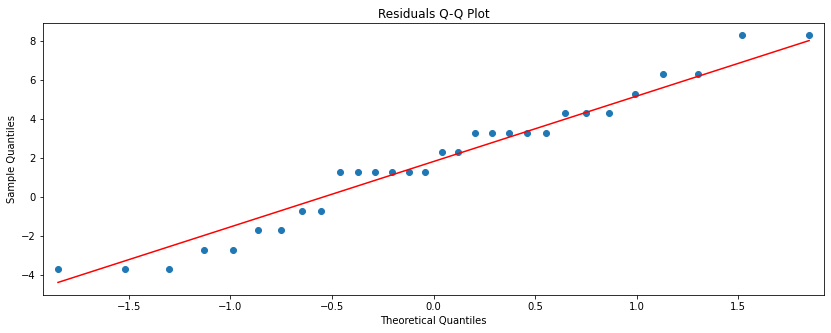

In [332]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

**Random Walk Pattern of Residuals**

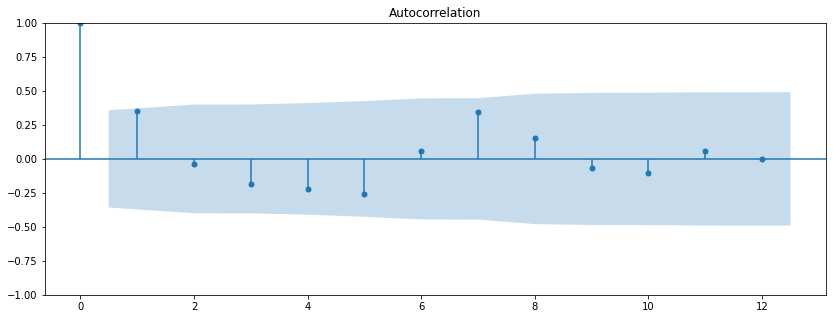

In [333]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

Residual tidak stasioner ada trend nya. Distribusi residualnya mendekati normal tapi masih ada autokorelasi

#### Model Evaluation

In [334]:
mean_absolute_percentage_error(y_test, y_pred_tbats) * 100

/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


58.56138472229978

### Kesimpulan

Model terbaik berdasarkan MAPE terkecil adalah menggunakan AutoETS yang memiliki MAPE 48,07%

Rekomendasi yang perlu dilakukan tim bisnis berdasarkan hasil forecasting : Berdasarkan model forecasting AutoETS, rata-rata total TRX 1 bulan kedepan sebanyak 7. Tim bisnis perlu membuat campaign yang menarik untuk meningkatkan jumlah transaksi.